In [1]:
import pandas as pd
import os

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import random

import numpy as np 
from upsetplot import plot, from_indicators
import pybedtools
sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)
sns.set(palette='husl', context = 'poster', style='white', color_codes=True)

In [2]:
BASE_PATH = "/".join(os.getcwd().split("/")) # base directory level

BIN_PATH = os.path.join(BASE_PATH, "bin")  # where my scripts live
DATA_PATH = os.path.join(BASE_PATH, "data")  # where I dump new data.
RESULTS_PATH = os.path.join(BASE_PATH, "results")  # where I analyze results

SRC_PATH = os.path.join(BASE_PATH, "src")  # where any packages needed to run analyses live. I haven't started structuring things this way yet. 

COMP_PATH = os.path.join(DATA_PATH,"pairwise")

In [3]:
BASE_PATH

'/wynton/group/capra/projects/modern_human_3Dgenome'

# Visualize shuffles

In [4]:
num_shuffles=10000
all_pops = pd.read_csv('%s/differentiation_shuffles/basic_%s_shuffles_differentiation_all.csv' %(RESULTS_PATH, num_shuffles), index_col=[0,1])#names=range(1,num_shuffles+1))
non_afr = pd.read_csv('%s/differentiation_shuffles/basic_%s_shuffles_differentiation_nonAFR.csv' %(RESULTS_PATH, num_shuffles), index_col=[ 0,1])


In [5]:
all_pops

1         2         3         4         5         6  \
chr1  1048576   0.064627 -0.100459 -0.221535  0.054717 -0.082374  0.119827   
      1572864  -0.166902 -0.133400 -0.300064  0.302971 -0.161319  0.047770   
      3145728   0.075949  0.160701  0.102741 -0.114205 -0.277302 -0.161380   
      3670016  -0.104035 -0.082304 -0.028316  0.064174 -0.114452  0.081143   
      4194304   0.001640  0.012137  0.069866  0.013608 -0.065319  0.116128   
...                  ...       ...       ...       ...       ...       ...   
chr22 46661632  0.000197  0.044710  0.137366  0.219604  0.219624  0.002035   
      47185920  0.228821  0.378444  0.458905  0.628946  0.449180  0.576252   
      47710208 -0.339014 -0.205088 -0.281619 -0.282816 -0.023959  0.279528   
      48234496 -0.128226  0.285271 -0.503330 -0.067565 -0.051848  0.506193   
      48758784 -0.072308  0.039537 -0.097273  0.156484 -0.036560 -0.004518   

                       7         8         9        10  ...      9991  \
chr1  1048576  -0.115846  0.021116  0.024124 -0.028022  ...  0.212250   
      1572864  -0.025568  0.089644  0.097326 -0.045043  ...  0.182881   
      3145728  -0.145573  0.067269  0.113401 -0.078219  ...  0.082419   
      3670016   0.033845  0.016826 -0.083432  0.013139  ...  0.118194   
      4194304   0.008431  0.046962 -0.145643 -0.008937  ... -0.036217   
...                  ...       ...       ...       ...  ...       ...   
chr22 46661632 -0.058740 -0.172409  0.085584  0.087862  ... -0.143777   
      47185920  0.267074  0.428926  0.651443  0.510949  ...  0.379433   
      47710208  0.255346  0.267598  0.204445  0.099177  ...  0.389425   
      48234496  0.440843  0.400939  0.077561  0.263696  ...  0.425716   
      48758784  0.242313 -0.191190 -0.044980 -0.086784  ...  0.140593   

                    9992      9993      9994      9995      9996      9997  \
chr1  1048576   0.097442 -0.162093 -0.264346  0.153555  0.047242 -0.238339   
      1572864   0.177746 -0.133422 -0.307104  0.107998  0.074901 -0.292615   
      3145728   0.150544  0.106123 -0.144882  0.100193 -0.127178 -0.034425   
      3670016   0.064988 -0.047524 -0.033433 -0.020688  0.044241  0.165959   
      4194304  -0.006149 -0.069918  0.001721 -0.049018  0.013234  0.236722   
...                  ...       ...       ...       ...       ...       ...   
chr22 46661632  0.035997 -0.435656 -0.164163 -0.193193  0.322511 -0.320616   
      47185920 -1.473362  0.381984  0.254945  0.316999 -1.354579  0.049698   
      47710208  0.191749 -0.104579 -0.274097  0.229701 -0.092827 -0.062485   
      48234496  0.541307 -0.446991 -0.190796  0.077923 -0.291938 -0.372652   
      48758784  0.037545 -0.065288 -0.042928 -0.023558 -0.041120  0.079360   

                    9998      9999     10000  
chr1  1048576  -0.151565  0.018406 -0.189377  
      1572864  -0.042207  0.082448  0.046191  
      3145728  -0.089390 -0.005710 -0.091084  
      3670016  -0.018218  0.071496  0.194383  
      4194304   0.006515 -0.042273  0.267165  
...                  ...       ...       ...  
chr22 46661632 -0.144610  0.041308 -0.239630  
      47185920 -0.006948  0.432862  0.103543  
      47710208 -0.198230  0.031746  0.244923  
      48234496 -0.846243 -0.325535  0.019761  
      48758784  0.027557  0.036886 -0.244854  

[4873 rows x 10000 columns]

In [6]:
non_afr

1         2         3         4         5         6  \
chr1  1048576  -0.022278  0.051015 -0.108752  0.005847  0.073727 -0.036259   
      1572864  -0.033565  0.149379 -0.019936 -0.007982  0.154109  0.026627   
      3145728  -0.018111 -0.115575  0.048660  0.042786 -0.046912  0.010175   
      3670016  -0.030693  0.039573 -0.002944  0.031077  0.059537 -0.110826   
      4194304  -0.005538  0.017247 -0.025317  0.054768 -0.074939 -0.034607   
...                  ...       ...       ...       ...       ...       ...   
chr22 46661632 -0.132709 -0.130069  0.031125 -0.010705  0.029848  0.017052   
      47185920  0.713740  0.621152  0.594839  0.433481 -1.657233  0.635401   
      47710208 -0.020138 -0.045548 -0.422835 -0.140026  0.294329  0.114534   
      48234496 -0.395309 -0.323260 -0.519841 -0.424068  0.272552 -0.257449   
      48758784 -0.055658  0.019832 -0.025417  0.111689  0.104231 -0.133101   

                       7         8         9        10  ...      9991  \
chr1  1048576  -0.180425  0.078716 -0.092041  0.166617  ... -0.048314   
      1572864  -0.074320  0.022998  0.050629 -0.034382  ...  0.052541   
      3145728   0.091084 -0.016991  0.249761 -0.106867  ...  0.075339   
      3670016   0.035425  0.077851  0.004660  0.048265  ... -0.065162   
      4194304   0.029110  0.053304 -0.010331 -0.018006  ... -0.081325   
...                  ...       ...       ...       ...  ...       ...   
chr22 46661632 -0.201580  0.008917 -0.090813  0.060262  ...  0.088377   
      47185920  0.651567 -1.758518  0.599770 -1.602385  ...  0.645221   
      47710208  0.059956 -0.255640 -0.025180  0.055636  ... -0.189255   
      48234496 -0.253090  0.001302  0.286103 -0.183589  ... -0.689486   
      48758784 -0.122696  0.068455  0.001398  0.099341  ... -0.133519   

                    9992      9993      9994      9995      9996      9997  \
chr1  1048576   0.002307  0.130097  0.036189 -0.018435 -0.031691 -0.076889   
      1572864   0.038296 -0.102202 -0.083037 -0.035976  0.078155  0.111732   
      3145728  -0.018721  0.008628  0.082081  0.162047 -0.039210  0.077631   
      3670016   0.006037 -0.014411 -0.012865  0.052867 -0.063315  0.292173   
      4194304  -0.018029  0.030139 -0.075721  0.036876 -0.078910  0.278338   
...                  ...       ...       ...       ...       ...       ...   
chr22 46661632  0.114101 -0.081435  0.006507 -0.087060  0.103786  0.048061   
      47185920  0.577292 -1.673852  0.666792  0.562732  0.690932 -1.628232   
      47710208  0.097059 -0.141873 -0.116002 -0.152537 -0.238188 -0.271185   
      48234496 -0.294020  0.063748 -0.761194  0.061308 -0.078088 -0.690140   
      48758784 -0.076886  0.003412 -0.046222 -0.047095 -0.190384 -0.110858   

                    9998      9999     10000  
chr1  1048576  -0.224545  0.137279  0.015556  
      1572864  -0.103208  0.251100  0.110179  
      3145728  -0.004771  0.110459  0.145274  
      3670016   0.080877 -0.047368  0.006711  
      4194304   0.112758 -0.006900 -0.058179  
...                  ...       ...       ...  
chr22 46661632  0.049487 -0.101619 -0.147502  
      47185920  0.589805 -1.698883  0.652537  
      47710208 -0.275149  0.196480  0.247508  
      48234496 -0.083411  0.506069  0.125928  
      48758784  0.065550 -0.236944  0.060830  

[4873 rows x 10000 columns]

In [7]:
def prep_shuffleDF(s):
    s = s.dropna(axis=1, how='all')
    save = s.copy()
    s.columns = names=range(1,num_shuffles+1)
    s.loc[('genome_avg','all'),] = s.mean(axis=0)
    s['shuffle_avg'] = s.mean(axis=1)
    return s

In [8]:
all_pops = prep_shuffleDF(all_pops)
non_afr = prep_shuffleDF(non_afr)

/wynton/home/capra/egilbertson/envs/akita/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2895: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/wynton/home/capra/egilbertson/envs/akita/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2895: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


In [9]:
def plot_distDFs(s, t):
    dists_1000 = pd.DataFrame()
    p = 0
    for i in range(0,10000+1,1000):
        print(i)
        if i >1:
            d=s.loc[('genome_avg','all'),][0:i]
            dists_1000[str(i)]=d
            p +=1
    dists_100 = pd.DataFrame()
    p = 0
    for i in range(0,1000+1,100):
        print(i)
        if i >1:
            d=s.loc[('genome_avg','all'),][0:i]
            dists_100[str(i)]=d
            p +=1
        
    plt.figure(figsize=(15,5))
    sns.boxplot(x='variable',y='value',data=dists_100.melt())
    plt.xlabel('num_shuffles')
    plt.ylabel('genome-avg fst')
    plt.title("%s: first 1K by 100" % t)
    
    plt.figure(figsize=(15,5))
    sns.boxplot(x='variable',y='value',data=dists_1000.melt())
    plt.xlabel('num_shuffles')
    plt.ylabel('genome-avg fst')
    plt.title("%s: first 10K by 1K" % t)
    return

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
100
200
300
400
500
600
700
800
900
1000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0
100
200
300
400
500
600
700
800
900
1000


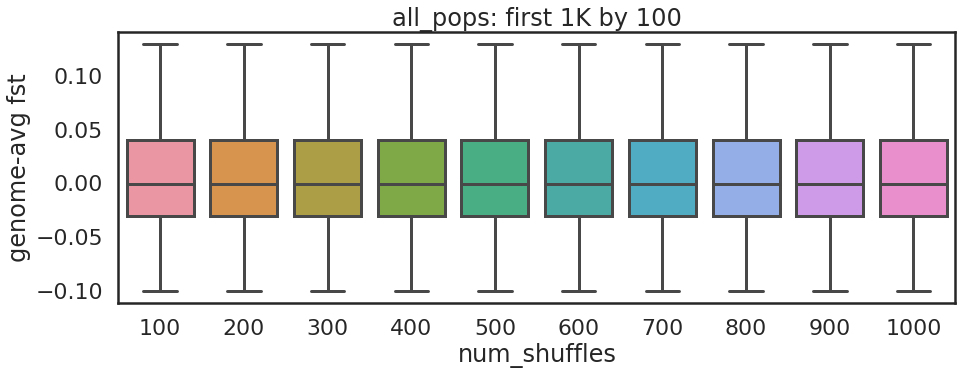

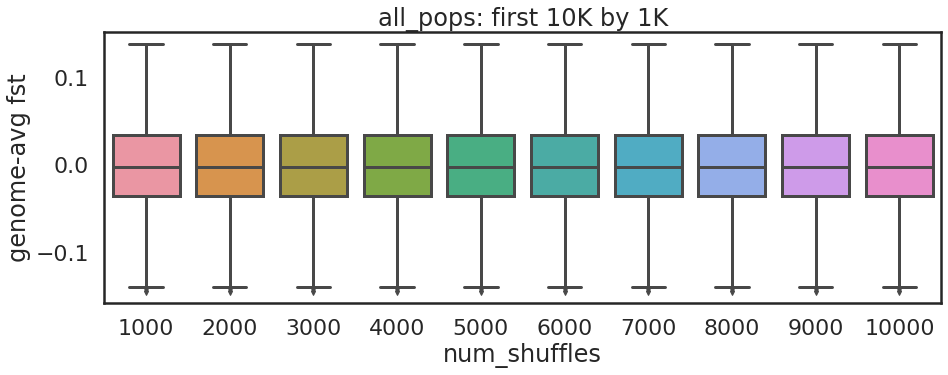

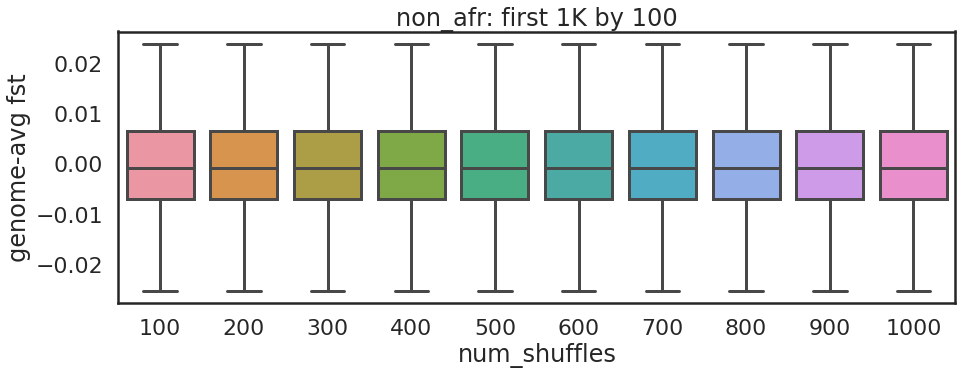

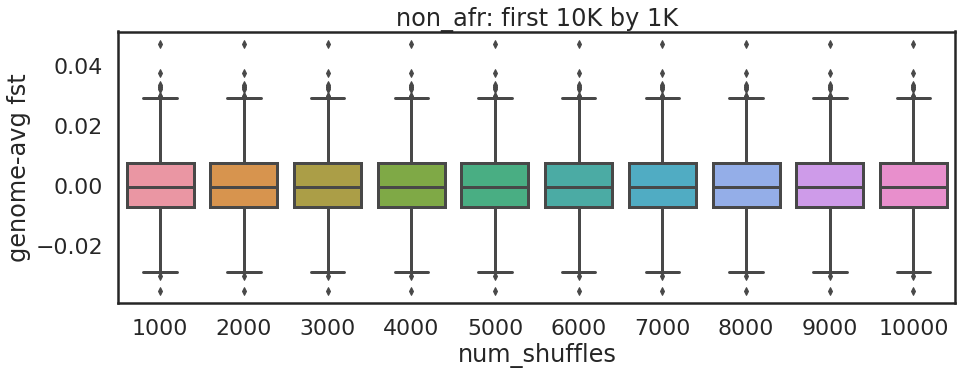

In [10]:
plot_distDFs(all_pops, "all_pops")
plot_distDFs(non_afr, "non_afr")

In [11]:
#plt.hist(dists_1000['10000'])
# fig, axs = plt.subplots(10, figsize=(10,120))

# plt.title('Genome Average')
# p = 0
# for i in range(0,1000+1,100):
#     print(i)
#     if i >1:
#         sd = s.loc[('genome_avg','all'),][0:i].std()
#         axs[p].hist(s.loc[('genome_avg','all'),][0:i], bins=50)
#         axs[p].set_title('num_suffles = ' + str(i) + '\n' + 'sd = ' + str(sd))
#         p +=1

# fig, axs = plt.subplots(10, figsize=(10,120))

# p = 0
# for i in range(0,1000+1,100):
#     print(i)
#     if i >1:
#         h = s.iloc[: , :i].mean(axis=1).drop(index=['genome_avg'])
#         sd = h.std()
#         axs[p].hist(h, bins=50)
#         axs[p].set_title('num_suffles = ' + str(i) + '\n' + 'sd = ' + str(sd))
#         p +=1

# fig, axs = plt.subplots(10, figsize=(10,120))

# plt.title('Genome Average')
# p = 0
# for i in range(0,num_shuffles+1,1000):
#     print(i)
#     if i > 1:
#         sd = s.loc[('genome_avg','all'),][0:i].std()
#         axs[p].hist(s.loc[('genome_avg','all'),][0:i], bins=50)
#         axs[p].set_title('num_suffles = ' + str(i) + '\n' + 'sd = ' + str(sd))
#         p +=1

# h = s.iloc[: , :1].mean(axis=1).drop(index=['genome_avg'])

# fig, axs = plt.subplots(10, figsize=(10,120))

# p = 0
# for i in range(0,num_shuffles+1,1000):
#     print(i)
#     if i >1:
#         h = s.iloc[: , :i].mean(axis=1).drop(index=['genome_avg'])
#         sd = h.std()
#         axs[p].hist(h, bins=50)
#         axs[p].set_title('num_suffles = ' + str(i) + '\n' + 'sd = ' + str(sd))
#         p +=1

# Find outlier regions

In [12]:
def format_shuffles(s):
    level_to_change = 1
    s.index = s.index.set_levels(s.index.levels[level_to_change].astype(str), level=level_to_change)
    s['minimum'] = s.min(axis=1)
    s['maximum'] = s.max(axis=1)
    shuff_range = s[['minimum','maximum']]
    
    return s, shuff_range

In [13]:
all_pops, all_range = format_shuffles(all_pops)
non_afr, nonAFR_range = format_shuffles(non_afr)

In [14]:
pops = pickle.load( open( "%s/intermediates/pops_dict.p" % DATA_PATH, "rb" ) )

In [15]:
pop_diffs_all = pd.DataFrame()
pop_diffs_nonAFR = pd.DataFrame()
for pop in pops.keys():
    if pop == "AFR":
        pop_diffs_all[pop] = pops[pop]['new_fst']
    else:
        pop_diffs_all[pop] = pops[pop]['new_fst']
        pop_diffs_nonAFR[pop] = pops[pop]['new_fst_nonAFR']

In [16]:
pop_diffs_all = pd.concat([all_range, pop_diffs_all], axis=1)
pop_diffs_nonAFR = pd.concat([nonAFR_range, pop_diffs_nonAFR], axis=1)

In [17]:
def check_outside_shuffle(pop_diffs):
    for pop in pops.keys():
        if pop in pop_diffs.columns:
            pop_diffs['%s_out'%pop] = (pop_diffs[pop].between(pop_diffs.minimum, pop_diffs.maximum)==False)
    return pop_diffs

In [18]:
pop_diffs_all = check_outside_shuffle(pop_diffs_all)
pop_diffs_nonAFR = check_outside_shuffle(pop_diffs_nonAFR)

In [19]:
pops_out_all=pop_diffs_all[['AFR_out', 'AMR_out','EUR_out','EAS_out','SAS_out']]
pops_out_nonAFR=pop_diffs_nonAFR[['AMR_out','EUR_out','EAS_out','SAS_out']]

In [20]:
pops_out_all = pops_out_all[(pops_out_all ==True).any(axis=1)]
pops_out_nonAFR = pops_out_nonAFR[(pops_out_nonAFR ==True).any(axis=1)]

In [21]:
pops_out_all.reset_index()

,level_0,level_1,AFR_out,AMR_out,EUR_out,EAS_out,SAS_out
0,chr1,101187584,False,False,False,True,False
1,chr1,103284736,False,False,False,True,False
2,chr1,107479040,False,False,False,True,False
3,chr1,108003328,False,False,False,True,False
4,chr1,109051904,False,False,False,True,False
...,...,...,...,...,...,...,...
1638,chr9,94896128,False,True,False,False,False
1639,chr9,95420416,False,False,False,True,False
1640,chr9,98041856,False,False,False,True,True
1641,chr9,9961472,True,False,False,True,False


In [22]:
def upset(pops_out, title):
    indicators = pops_out.reset_index().drop(columns=['level_0','level_1'])
    listy = pops_out.index
    listx=[]
    for i in listy:
        listx.append(str(i))
    data = pd.DataFrame({"value": listx, **indicators})
    ind_dict = {}
    for pop in indicators.columns:
        ind_dict[pop] = list(indicators[pop].values)
    e = from_indicators(ind_dict, data = data)
    fig= plt.figure(figsize=(20,10))
    plot(e, fig=fig, element_size=None, sort_by='cardinality', show_counts=True)
    plt.title(title)
    return

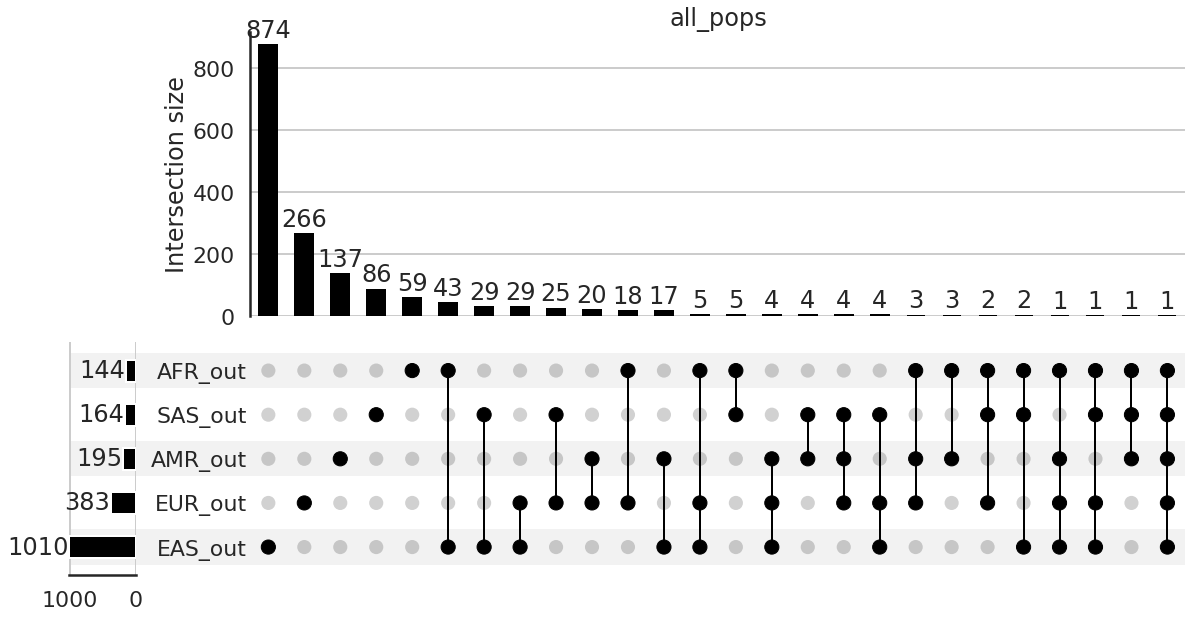

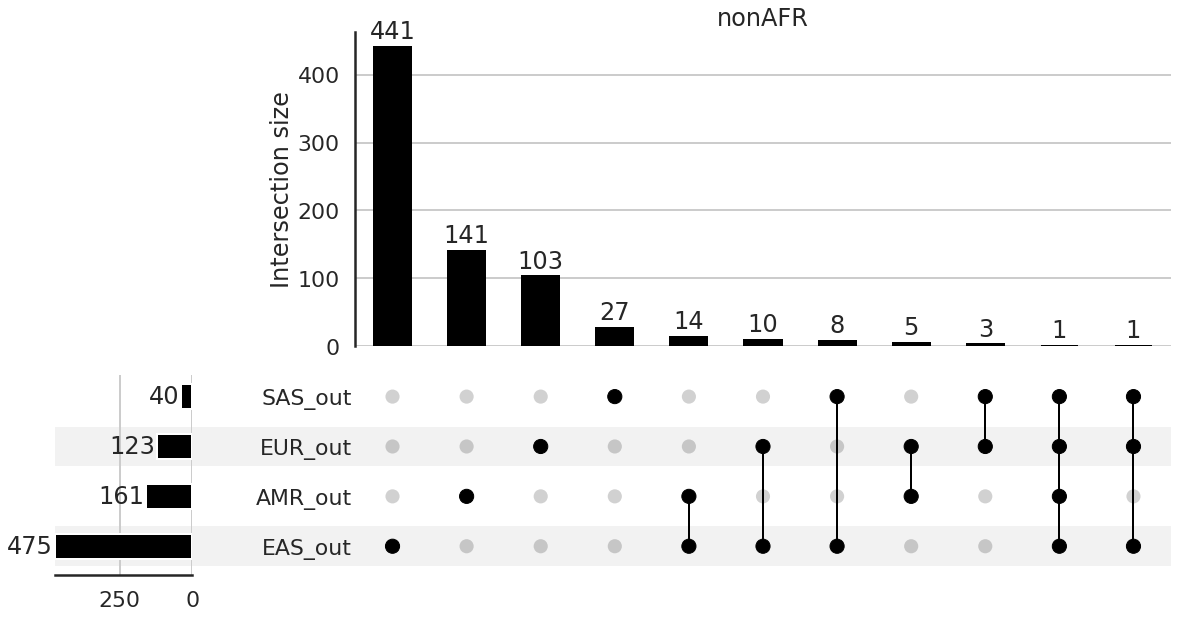

In [23]:
upset(pops_out_all, "all_pops")
upset(pops_out_nonAFR, "nonAFR")

In [24]:
eas_only = pops_out_nonAFR[pops_out_nonAFR["EAS_out"]][pops_out_nonAFR["AMR_out"]==False][pops_out_nonAFR["EUR_out"]==False][pops_out_nonAFR["SAS_out"]==False]

/wynton/home/capra/egilbertson/envs/akita/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/wynton/home/capra/egilbertson/envs/akita/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/wynton/home/capra/egilbertson/envs/akita/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

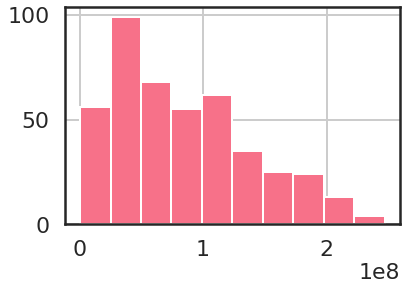

In [25]:
pd.Series(eas_only.index.get_level_values(1).astype('int')).hist()

In [26]:
eas_only

AMR_out  EUR_out  EAS_out  SAS_out
chr1 101187584    False    False     True    False
     109576192    False    False     True    False
     113246208    False    False     True    False
     114294784    False    False     True    False
     118489088    False    False     True    False
...                 ...      ...      ...      ...
chr9 81788928     False    False     True    False
     86507520     False    False     True    False
     8912896      False    False     True    False
     9437184      False    False     True    False
     9961472      False    False     True    False

[441 rows x 4 columns]

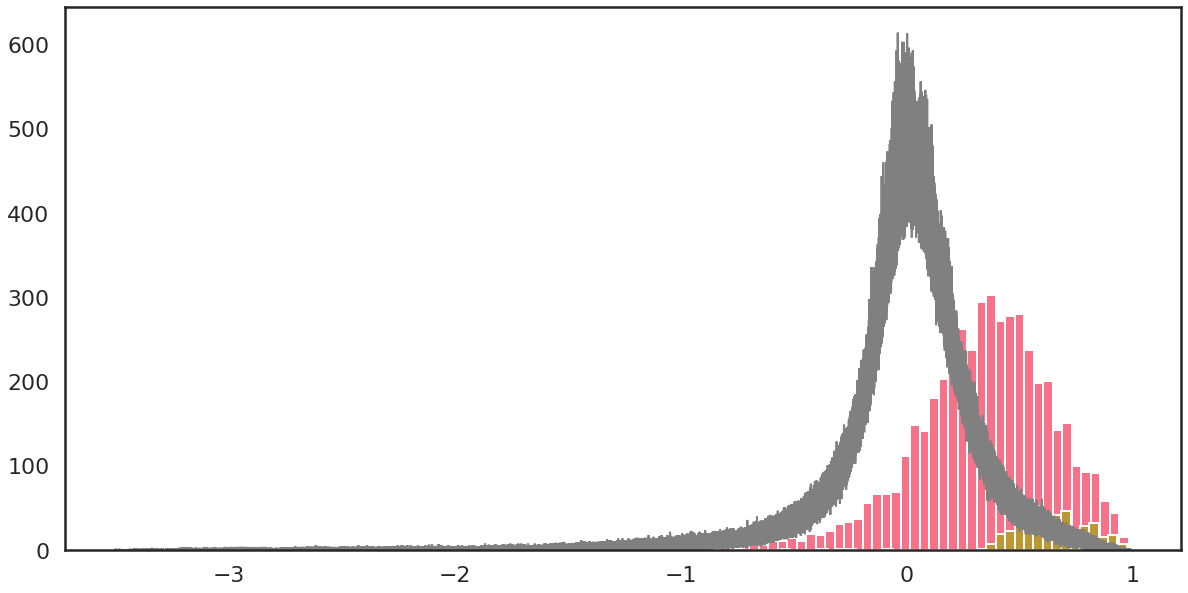

In [27]:
plt.figure(figsize=(20,10))
s = plt.hist(all_pops.stack(), bins = 1000000, histtype='step', color='grey')
eas = plt.hist(pop_diffs_all.EAS, bins=100)
eas = plt.hist(pop_diffs_all.loc[eas_only.index].EAS, bins=100)

In [28]:
pop_diffs_all.EAS

chr1        100139008    0.512607
            100663296    0.287065
            101187584    0.599291
            101711872    0.252986
            102236160    0.217401
                           ...   
chr9        98566144       0.3139
            99090432     0.322982
            9961472      0.477947
            99614720     0.924934
genome_avg  all               NaN
Name: EAS, Length: 4874, dtype: object

In [29]:
pop_diffs_all['shuff_range'] = np.abs(pop_diffs_all['maximum']-pop_diffs_all['minimum'])

<AxesSubplot:>

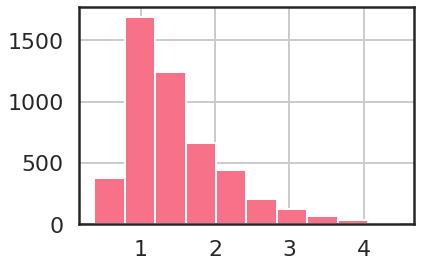

In [31]:
pop_diffs_all.shuff_range.hist()

Text(0, 0.5, 'Frequency')

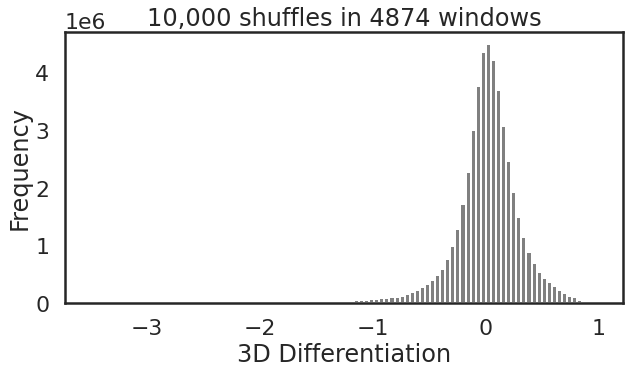

In [37]:
plt.figure(figsize=(10,5))
s = plt.hist(all_pops.stack(), bins = 100, color='grey', rwidth=1)
plt.title('10,000 shuffles in 4874 windows')
plt.xlabel('3D Differentiation')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

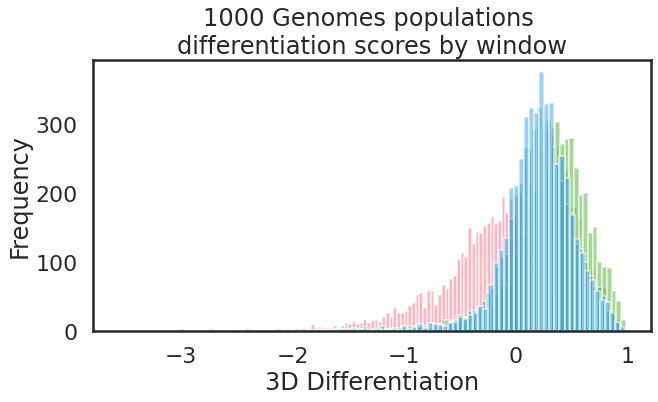

In [39]:
plt.figure(figsize=(10,5))
afr = plt.hist(pop_diffs_all.AFR, alpha=0.5, bins=100)
eur = plt.hist(pop_diffs_all.EUR, alpha=0.5, bins=100)
eas = plt.hist(pop_diffs_all.EAS, alpha=0.5, bins=100)
sas = plt.hist(pop_diffs_all.SAS, alpha=0.5, bins=100)
amr = plt.hist(pop_diffs_all.AMR, alpha=0.5, bins=100)
plt.title('1000 Genomes populations \ndifferentiation scores by window')
plt.xlabel('3D Differentiation')
plt.ylabel('Frequency')

# gene list

In [ ]:
pop_diffs

In [ ]:
all_windows = pd.DataFrame(index=pop_diffs.index).reset_index()
all_windows.columns = ['chr','start']

In [ ]:
all_windows['end'] = all_windows['start'] + 2**20

In [ ]:
all_windows

In [ ]:
all_bed = pybedtools.BedTool.from_dataframe(all_windows)

In [ ]:
all_bed.saveas('/wynton/group/capra/projects/modern_human_3Dgenome/data/phenotype_enrichment/data/all_windows.bed')

In [ ]:
gene_df = genes.to_dataframe(disable_auto_names=True, header=None)

In [ ]:
shuffled = all_windows.sample(n=windows.shape[0], random_state=1)
shuffled_bed = pybedtools.BedTool.from_dataframe(shuffled)

In [ ]:
genes = pybedtools.BedTool('/wynton/group/capra/projects/modern_human_3Dgenome/data/phenotype_enrichment/data/grch38_gene_annotations.bed')

In [ ]:
intersect = all_bed.intersect(shuffled_bed, wo = True).intersect(genes, loj = True).to_dataframe(disable_auto_names=True, header=None)

In [ ]:
intersect

In [ ]:

windows = pd.DataFrame(index=pops_out.index).reset_index()
windows.columns = ['chr','start']

In [ ]:
windows

In [ ]:
windows['end'] = windows['start'] + 2**20

In [ ]:
windows['chr'] = windows['chr'].str.strip('chr')

In [ ]:
windows

In [ ]:
genes = pybedtools.BedTool('/wynton/group/capra/projects/archaic_splicing/data/annotations/grch38_gene_annotations.bed')

In [ ]:
window_bed = pybedtools.BedTool.from_dataframe(windows)

In [ ]:
window_bed.saveas('/wynton/group/capra/projects/modern_human_3Dgenome/data/phenotype_enrichment/data/diff_windows.bed')

In [ ]:
gene_overlap = window_bed.intersect(genes, wao=True).to_dataframe(names=['window_chrm','start','end','gene_chr','gene_start','gene_end','gene_name','overlap'])

In [ ]:
gene_overlap.gene_name.unique().shape

In [ ]:
gene_overlap

In [ ]:
gene_map = gene_overlap.drop(columns=['gene_chr','gene_start','gene_end','overlap'])

In [ ]:
gene_map['chr'] = 'chr' + gene_map['window_chrm'].astype('str')

In [ ]:
gene_map = gene_map.drop(columns=['window_chrm'])

In [ ]:
a = gene_map['gene_name'].unique()

In [ ]:
pd.DataFrame(a).to_csv('/wynton/group/capra/projects/modern_human_3Dgenome/data/phenotype_enrichment/data/diff_window_genes_observed.txt', header=None, index=False)

In [ ]:
np.savetxt('diff_window_genes_observed.txt', a, delimiter='\n')

In [ ]:
gene_map.set_index(['chr','start'])

In [ ]:
pops_out[pops_out.AFR_out].index

In [ ]:
popsgene_map

In [ ]:
def get_gene():
    gene_list=[]
    
